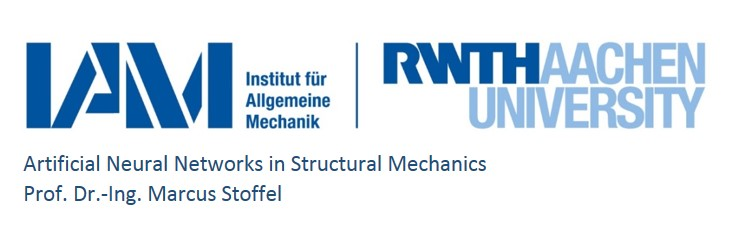

# Exercise 7

The goal of this exercise is to understand underfitting and overfitting of a model and ways to workaround it.
*******************************************************************************************************************************
Session:
-------------
* Understanding feature scaling.
* Comparing scaling strategies.
* Understanding the reason for Underfitting and overfitting.
* Strategy to detect overfitting.
* Datasets for training.
* Strategies to control overfitting. (L0,L1 and L2 regularisations)
* Comparing different regularization strategies.
* Implementing the above strategies to train our model.

The session involves following tasks

Task:
--------

* Import the data from csv file using pandas.
* Split the data into test and train, inputs and outputs.
* Setup layers required for computation.
* Train and save the model.
* Reload the model and predict the output using test data. 
* Plot errors.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
data = pd.read_csv('ipdata.csv',delimiter=',')
data.head()

In [ ]:
x = np.array(data.drop(columns=['S11','S12','S22','S33']))
y = np.array(data.drop(columns=['LE11','LE12','LE22','LE33','PE11','PE12','PE22','PE33','S33']))
a = np.linspace(0,10,len(x)) #for plotting

# Feature scaling

### Min Max Normalization


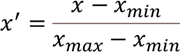

### Standardization or Z Score Normalization

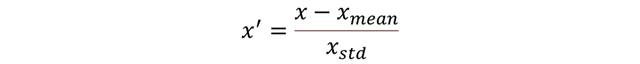

In [ ]:
# Define functions for feature scaling

def min_max_norm(x):
    
    return 

def z_score_norm_standardisation(x):
    
    return 

In [ ]:
# Perform feature scaling using defined functions
x_mm = min_max_norm(x)
y_mm = min_max_norm(y)
x_std  = z_score_norm_standardisation(x)
y_std  = z_score_norm_standardisation(y)

In [ ]:
# Plot to compare different scaling techniques
plt.title('FeatureScaling')
plt.plot(a,x_mm[:,1],label='MinMaxNorm')
plt.plot(a,x_std[:,1],label='Standardization')
plt.legend()

In [ ]:
# Initialize scalers from scikit learn
minmax = MinMaxScaler()
zscore = StandardScaler()

In [ ]:
# Perform feature scaling using scikitlearn scalers
x_skmm  = minmax.fit_transform(x)
y_skmm  = minmax.fit_transform(y)

x_skstd = zscore.fit_transform(x)
y_skstd = zscore.fit_transform(y)

In [ ]:
# Compare defined functions and scikitlearn scalers
plt.plot(a,x_mm[:,1],label='MinMaxNorm')
plt.plot(a,x_skmm[:,1],label='MinMaxNorm_Sklearn')
plt.plot(a,x_std[:,1],label='ZscoreNorm')
plt.plot(a,x_skstd[:,1],label='ZscoreNorm_Sklearn')

In [ ]:
# Build a Sequential model with one hidden layer

model = 

model.add()
model.add()

model.summary()

In [ ]:
model.compile()

### Fit the unscaled data for 10 epochs and see how the error looks and reduces

In [ ]:
history1 = model.fit()

### Fit the Min-Max normalized data for 10 epochs and see how the error looks and reduces

In [ ]:
history2 = model.fit()

### Fit the Standardized data for 10 epochs and see how the error looks and reduces

In [ ]:
history3 = model.fit()

# Overfitting and Underfitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
dataset = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv',delimiter=',')
dataset.head()

## Prepare dataset

* Remove NAN values
* Drop columns "Suburb", "Address", "CouncilArea"
* Remove dummies

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset = dataset.drop(columns=['Suburb','Address','CouncilArea'])

In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [ ]:
dataset.shape

## Split data

* m - input da\ta which contains all the columns except price
* n - output data which is just price

In [ ]:
m = 
n = 

## Split the data using train_test_split

In [ ]:
m_train,m_test,n_train,n_test = train_test_split()

## Use Sklearn LinearRegressiosn to fit the data

In [ ]:
from sklearn.linear_model import LinearRegression

LinearModel = LinearRegression().fit(m_train,n_train)

In [ ]:
LinearModel.score(m_test, n_test)

In [ ]:
LinearModel.score(m_train, n_train)

## L1 Regularization aka Lasso

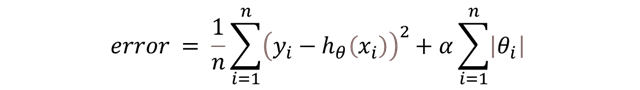

In [ ]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=0.01,max_iter=100,tol=0.1)

lasso_reg.fit(m_train,n_train)

In [ ]:
lasso_reg.score(m_test,n_test)

## L2 Regularization aka Ridge

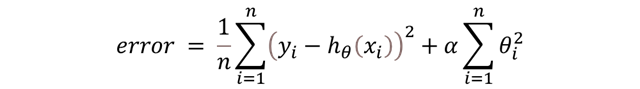

In [ ]:
ridge_reg = linear_model.Ridge(alpha=10,max_iter=100,tol=0.1)

ridge_reg.fit(m_train,n_train)

In [ ]:
ridge_reg.score(m_test,n_test)

# Evaluating Machine learning models

## Splitting data sets for testing and training

* Use the data from ipdata.csv file
* Use any of the normalization methods to scale data

In [ ]:
x_scaled = minmax.fit_transform(x)
y_scaled = minmax.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split()

### Define a sequential model with two hidden layers


In [ ]:
matmodel =

matmodel.add()
matmodel.add()                                       
matmodel.add()

matmodel.summary()

In [ ]:
matmodel.compile()

In [ ]:
history = matmodel.fit()

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

In [ ]:
plt.title('Error plot')
plt.plot(hist['mse'], label='mse')
plt.plot(hist['val_mse'], label='Validation_mse')
plt.legend()

In [ ]:
history = matmodel.fit()

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

In [ ]:
plt.title('Error plot')
plt.plot(hist['mse'], label='mse')
plt.plot(hist['val_mse'], label='Validation_mse')
plt.legend()

In [ ]:
model.evaluate(x_test,y_test)

## K-Fold Cross Validation with holdout

aka The Gold Standard of CV

In [ ]:
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold

